In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = sns.load_dataset('tips')

In [67]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We need to predict the total bill.


Dependent Variable = total_bill

Independent Variable = tip, sex, smoler, day, time, size

In [68]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [69]:
categorical_var = df.select_dtypes(include='category')
categorical_var.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [70]:
# Rows and columns in our dataset
df.shape

(244, 7)

In [71]:
# Descriptive Statistic

df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [72]:
# Checking duplicates
df.duplicated().sum()

1

In [73]:
df[df.duplicated()==True]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [74]:
# missing values
df.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [75]:
df[df.duplicated()==False]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [76]:
# Value count of different categorical variable

for col in categorical_var:
  values = df[col].value_counts()
  print(f'{values}\n')

sex
Male      157
Female     87
Name: count, dtype: int64

smoker
No     151
Yes     93
Name: count, dtype: int64

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time
Dinner    176
Lunch      68
Name: count, dtype: int64



In [77]:
# Unique values in dataset columns

for col in df.columns:
  unique = df[col].unique()
  print(f'{col.title()}:- \n{unique}\n')

Total_Bill:- 
[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 24.52 20.76 31.71 10

In [78]:
# Independent Variables
X = df.iloc[:,1:]
X

,tip,sex,smoker,day,time,size
0,1.01,Female,No,Sun,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
3,3.31,Male,No,Sun,Dinner,2
4,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,5.92,Male,No,Sat,Dinner,3
240,2.00,Female,Yes,Sat,Dinner,2
241,2.00,Male,Yes,Sat,Dinner,2
242,1.75,Male,No,Sat,Dinner,2


In [79]:
# Dependent Variable
y = df.iloc[:,0]
y

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [80]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [81]:
X_train

,tip,sex,smoker,day,time,size
115,3.50,Female,No,Sun,Dinner,2
181,5.65,Male,Yes,Sun,Dinner,2
225,2.50,Female,Yes,Fri,Lunch,2
68,2.01,Male,No,Sat,Dinner,2
104,4.08,Female,No,Sat,Dinner,2
...,...,...,...,...,...,...
106,4.06,Male,Yes,Sat,Dinner,2
14,3.02,Female,No,Sun,Dinner,2
92,1.00,Female,Yes,Fri,Dinner,2
179,3.55,Male,Yes,Sun,Dinner,2


In [82]:
X_test

,tip,sex,smoker,day,time,size
24,3.18,Male,No,Sat,Dinner,2
6,2.00,Male,No,Sun,Dinner,2
153,2.00,Male,No,Sun,Dinner,4
211,5.16,Male,Yes,Sat,Dinner,4
198,2.00,Female,Yes,Thur,Lunch,2
...,...,...,...,...,...,...
172,5.15,Male,Yes,Sun,Dinner,2
242,1.75,Male,No,Sat,Dinner,2
152,2.74,Male,No,Sun,Dinner,3
231,3.00,Male,Yes,Sat,Dinner,3


In [83]:
y_train

,total_bill
115,17.31
181,23.33
225,16.27
68,20.23
104,20.92
...,...
106,20.49
14,14.83
92,5.75
179,34.63


In [84]:
y_test

,total_bill
24,19.82
6,8.77
153,24.55
211,25.89
198,13.00
...,...
172,7.25
242,17.82
152,17.26
231,15.69


In [85]:
# Feature encoding :- label encoding, onehot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

In [86]:
# Transforming train data using label encoder
X_train['sex'] = le1.fit_transform(X_train['sex'])
X_train['smoker'] = le2.fit_transform(X_train['smoker'])
X_train['time'] = le3.fit_transform(X_train['time'])

In [87]:
X_train.head()

,tip,sex,smoker,day,time,size
115,3.50,0,0,Sun,0,2
181,5.65,1,1,Sun,0,2
225,2.50,0,1,Fri,1,2
68,2.01,1,0,Sat,0,2
104,4.08,0,0,Sat,0,2


In [88]:
# Transforming test data using label encoder
X_test['sex'] = le1.transform(X_test['sex'])
X_test['smoker'] = le2.transform(X_test['smoker'])
X_test['time'] = le3.transform(X_test['time'])

In [89]:
X_test.head()

,tip,sex,smoker,day,time,size
24,3.18,1,0,Sat,0,2
6,2.00,1,0,Sun,0,2
153,2.00,1,0,Sun,0,4
211,5.16,1,1,Sat,0,4
198,2.00,0,1,Thur,1,2


In [90]:
# OneHot Encoder -- ColumnTransformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [91]:
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'),[3])], remainder='passthrough')

In [92]:
import sys
np.set_printoptions(threshold=sys.maxsize)
X_train = ct.fit_transform(X_train)


In [93]:
X_train

array([[ 0.  ,  1.  ,  0.  ,  3.5 ,  0.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  5.65,  1.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  0.  ,  2.5 ,  0.  ,  1.  ,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  2.01,  1.  ,  0.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  4.08,  0.  ,  0.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  2.09,  1.  ,  1.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ],
       [ 1.  ,  0.  ,  0.  ,  3.41,  1.  ,  1.  ,  0.  ,  3.  ],
       [ 0.  ,  1.  ,  0.  ,  3.48,  1.  ,  0.  ,  0.  ,  3.  ],
       [ 0.  ,  1.  ,  0.  ,  2.  ,  1.  ,  0.  ,  0.  ,  4.  ],
       [ 1.  ,  0.  ,  0.  ,  3.  ,  1.  ,  1.  ,  0.  ,  5.  ],
       [ 0.  ,  0.  ,  1.  ,  2.71,  1.  ,  0.  ,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  3.  ,  0.  ,  0.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  3.  ,  1.  ,  1.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  3.  ,  1.  ,  0.  ,  0.  ,  4.  ],
       [ 0.  ,  1.  ,  0.

In [94]:
X_test = ct.transform(X_test)

In [95]:
X_test

array([[1.  , 0.  , 0.  , 3.18, 1.  , 0.  , 0.  , 2.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 0.  , 0.  , 2.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 0.  , 0.  , 4.  ],
       [1.  , 0.  , 0.  , 5.16, 1.  , 1.  , 0.  , 4.  ],
       [0.  , 0.  , 1.  , 2.  , 0.  , 1.  , 1.  , 2.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 1.  , 0.  , 2.  ],
       [0.  , 0.  , 1.  , 2.56, 1.  , 1.  , 1.  , 2.  ],
       [0.  , 0.  , 1.  , 2.52, 0.  , 0.  , 1.  , 2.  ],
       [0.  , 1.  , 0.  , 3.23, 1.  , 0.  , 0.  , 2.  ],
       [0.  , 0.  , 0.  , 3.  , 0.  , 1.  , 0.  , 2.  ],
       [0.  , 1.  , 0.  , 3.  , 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 1.47, 1.  , 0.  , 0.  , 2.  ],
       [0.  , 0.  , 1.  , 1.5 , 0.  , 0.  , 1.  , 2.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 1.  , 0.  , 2.  ],
       [0.  , 0.  , 1.  , 1.83, 0.  , 0.  , 1.  , 1.  ],
       [0.  , 0.  , 1.  , 1.36, 0.  , 0.  , 1.  , 3.  ],
       [0.  , 0.  , 1.  , 4.  , 1.  , 1.  , 1.  , 3.  ],
       [0.  , 1.  , 0.  , 3.92,

In [96]:
# SVR - Support Vector Regressor
from sklearn.svm import SVR
svr = SVR()

In [97]:
svr.fit(X_train, y_train)

SVR()

In [98]:
y_pred = svr.predict(X_test)

In [99]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
print(f'R2 Score:- {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error:- {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error:- {mean_absolute_error(y_test, y_pred)}')

R2 Score:- 0.49798620106004743
Mean Squared Error:- 39.31122612339172
Mean Absolute Error:- 4.463296539661225


In [100]:
# hyperparameter tuning using GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100, 1000],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf','linear']}

In [101]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svr, param_grid, refit=True, verbose=3)

# fitting the model for gridsearch
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.114 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.008 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.123 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.502 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.650 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.383 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.635 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.202 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.019 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [102]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [103]:
grid_predictions = grid.predict(X_test)

In [104]:
print(f'R2 Score:- {r2_score(y_test, grid_predictions)}')
print(f'Mean Squared Error:- {mean_squared_error(y_test, grid_predictions)}')
print(f'Mean Absolute Error:- {mean_absolute_error(y_test, grid_predictions)}')

R2 Score:- 0.5630727637616455
Mean Squared Error:- 34.21448856486322
Mean Absolute Error:- 4.260483973872266


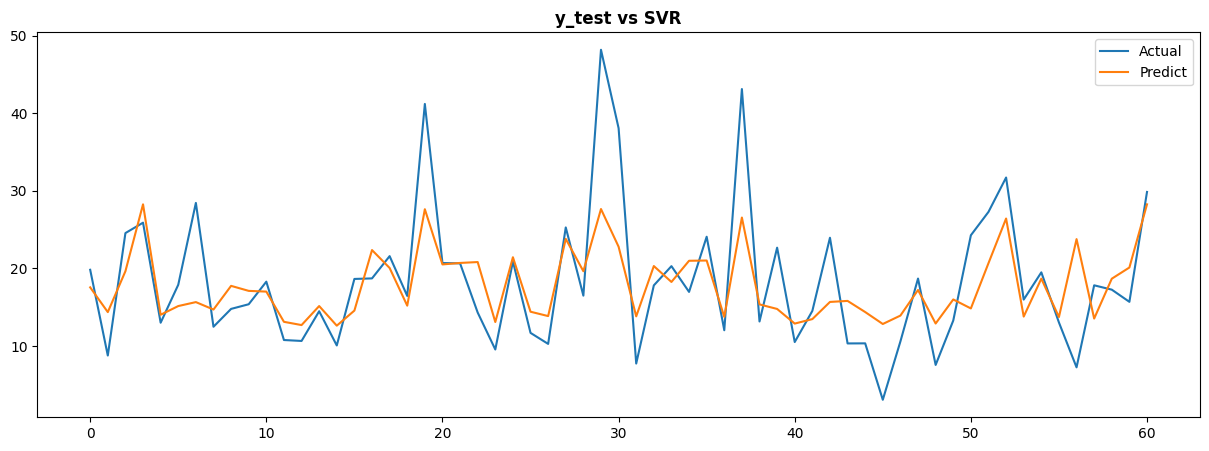

In [111]:
plt.figure(figsize = (15,5))
sns.lineplot(np.array(y_test), label = 'Actual')
sns.lineplot(np.array(y_pred), label='Predict')
plt.title('y_test vs SVR',fontweight = 'bold', fontsize = 12)
plt.legend()
plt.show()

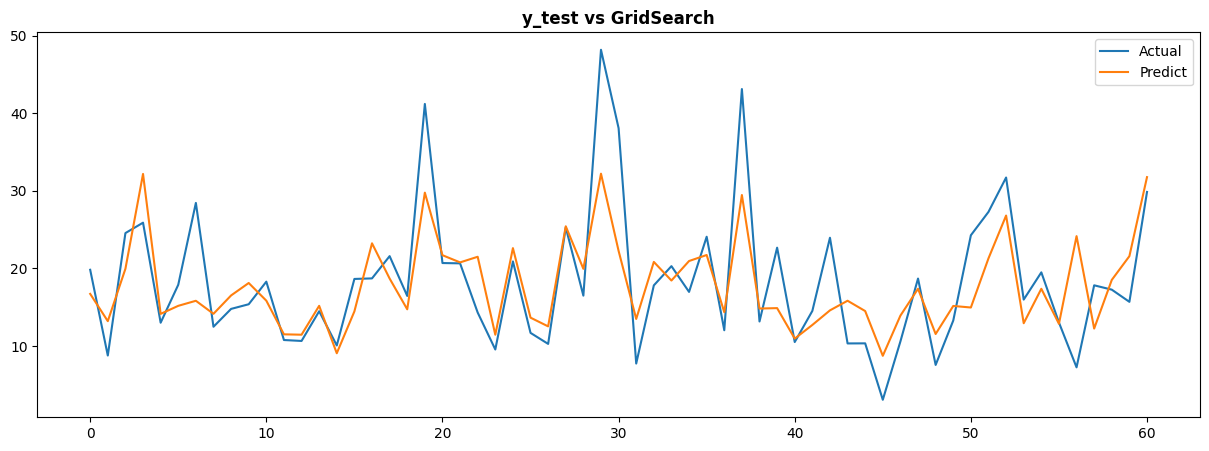

In [112]:
plt.figure(figsize = (15,5))
sns.lineplot(np.array(y_test), label = 'Actual')
sns.lineplot(np.array(grid_predictions), label='Predict')
plt.title('y_test vs GridSearch',fontweight = 'bold', fontsize = 12)
plt.legend()
plt.show()

In [107]:
metrics = pd.DataFrame(columns=['Model', 'R2 Score', 'Mean Squared Error', 'Mean Absolute Error'])

In [108]:
metrics = pd.concat([metrics, pd.DataFrame([{
    'Model':'SVR',
    'R2 Score':r2_score(y_test, y_pred),
    'Mean Squared Error':mean_squared_error(y_test, y_pred),
    'Mean Absolute Error':mean_absolute_error(y_test, y_pred)}])], ignore_index=True)

In [109]:
metrics = pd.concat([metrics, pd.DataFrame([{
    'Model':'Gridsearch',
    'R2 Score':r2_score(y_test, grid_predictions),
    'Mean Squared Error':mean_squared_error(y_test, grid_predictions),
    'Mean Absolute Error':mean_absolute_error(y_test, grid_predictions)}])], ignore_index=True)

In [110]:
metrics

,Model,R2 Score,Mean Squared Error,Mean Absolute Error
0,SVR,0.497986,39.311226,4.463297
1,Gridsearch,0.563073,34.214489,4.260484
